In [1]:
%cd ../
%matplotlib inline

/home/zulqarnain/run_all_htfa/htfatorch


In [2]:
import logging
import numpy as np
import htfa_torch.htfa_all as HTFA
import htfa_torch.utils as utils

In [3]:
import glob

dataset_directory = '/home/zulqarnain/Datasets/new_pieman/pieman_data_intact/'
data_files = glob.glob(dataset_directory + '*.nii')


In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis(data_files[:], num_factors=10,
                                                  mask='/home/zulqarnain/Datasets/new_pieman/pieman_data_intact/wholebrain.nii.gz')

In [6]:
prior_sample, _ = htfa.sample(posterior_predictive=False)

for s in range(htfa.num_subjects):
    logging.info('Prior Reconstruction Error (Frobenius Norm) for subject %d: %.8e', s,
        np.linalg.norm(
            prior_sample['Y%d' % s].value.data.cpu().numpy() - htfa.voxel_activations[s].numpy()
        )
    )

prior_sample

04/08/2018 22:57:13 Prior Reconstruction Error (Frobenius Norm) for subject 0: 4.98082959e+03
04/08/2018 22:57:13 Prior Reconstruction Error (Frobenius Norm) for subject 1: 4.98171680e+03
04/08/2018 22:57:13 Prior Reconstruction Error (Frobenius Norm) for subject 2: 4.97977930e+03


Trace{'template_factor_centers': Normal([torch.FloatTensor of size 25x3]), 'template_factor_log_widths': Normal([torch.FloatTensor of size 25]), 'voxel_noise': Normal([torch.FloatTensor of size 3]), 'Weights0': Normal([torch.FloatTensor of size 300x25]), 'FactorCenters0': Normal([torch.FloatTensor of size 25x3]), 'FactorLogWidths0': Normal([torch.FloatTensor of size 25]), 'Weights1': Normal([torch.FloatTensor of size 300x25]), 'FactorCenters1': Normal([torch.FloatTensor of size 25x3]), 'FactorLogWidths1': Normal([torch.FloatTensor of size 25]), 'Weights2': Normal([torch.FloatTensor of size 300x25]), 'FactorCenters2': Normal([torch.FloatTensor of size 25x3]), 'FactorLogWidths2': Normal([torch.FloatTensor of size 25]), 'Y0': Normal([torch.FloatTensor of size 300x82023]), 'Y1': Normal([torch.FloatTensor of size 300x82023]), 'Y2': Normal([torch.FloatTensor of size 300x82023])}

/home/zulqarnain/.conda/envs/htfatorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1307: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


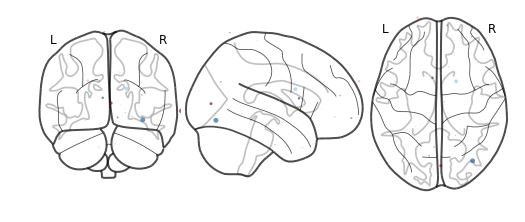

In [7]:
htfa.plot_factor_centers(trace=prior_sample)

/home/zulqarnain/.conda/envs/htfatorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1307: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


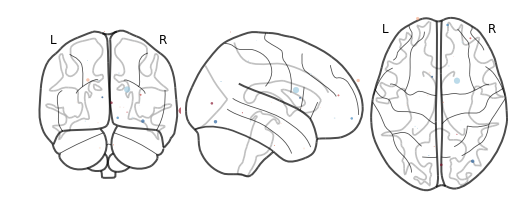

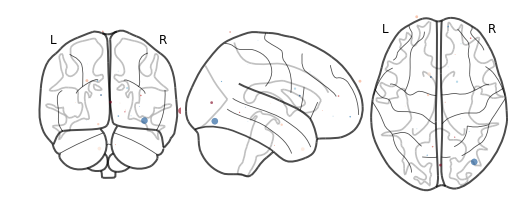

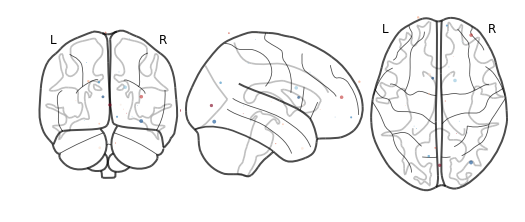

In [8]:
for s in range(htfa.num_subjects):
    htfa.plot_factor_centers(subject=s, trace=prior_sample)

In [9]:
del prior_sample

In [10]:
variational_sample, _ = htfa.sample(posterior_predictive=True)

for s in range(htfa.num_subjects):
    logging.info('Prior Reconstruction Error (Frobenius Norm) for subject %d: %.8e', s,
        np.linalg.norm(
            variational_sample['Y%d' % s].value.data.cpu().numpy() -
            htfa.voxel_activations[s].numpy()
        )
    )

variational_sample

04/08/2018 22:57:20 Prior Reconstruction Error (Frobenius Norm) for subject 0: 1.47772236e+04
04/08/2018 22:57:20 Prior Reconstruction Error (Frobenius Norm) for subject 1: 1.56146992e+04
04/08/2018 22:57:20 Prior Reconstruction Error (Frobenius Norm) for subject 2: 1.48603857e+04


Trace{'template_factor_centers': Normal([torch.FloatTensor of size 1x25x3]), 'template_factor_log_widths': Normal([torch.FloatTensor of size 1x25]), 'voxel_noise': Normal([torch.FloatTensor of size 1x3]), 'Weights0': Normal([torch.FloatTensor of size 1x300x25]), 'FactorCenters0': Normal([torch.FloatTensor of size 1x25x3]), 'FactorLogWidths0': Normal([torch.FloatTensor of size 1x25]), 'Weights1': Normal([torch.FloatTensor of size 1x300x25]), 'FactorCenters1': Normal([torch.FloatTensor of size 1x25x3]), 'FactorLogWidths1': Normal([torch.FloatTensor of size 1x25]), 'Weights2': Normal([torch.FloatTensor of size 1x300x25]), 'FactorCenters2': Normal([torch.FloatTensor of size 1x25x3]), 'FactorLogWidths2': Normal([torch.FloatTensor of size 1x25]), 'Y0': Normal([torch.FloatTensor of size 1x300x82023]), 'Y1': Normal([torch.FloatTensor of size 1x300x82023]), 'Y2': Normal([torch.FloatTensor of size 1x300x82023])}

/home/zulqarnain/.conda/envs/htfatorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1307: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


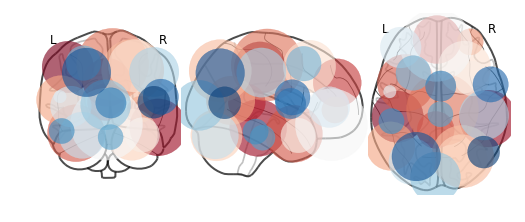

In [11]:
htfa.plot_factor_centers(trace=variational_sample)

/home/zulqarnain/.conda/envs/htfatorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1307: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


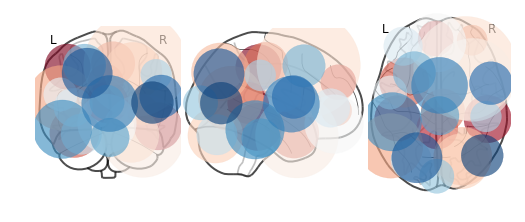

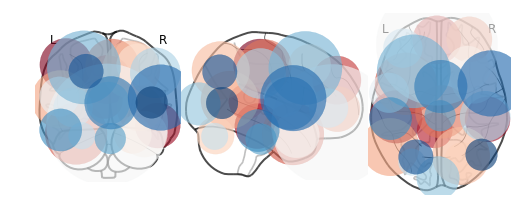

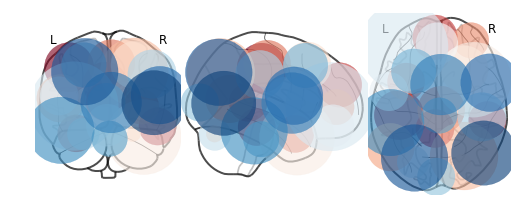

In [12]:
for s in range(htfa.num_subjects):
    htfa.plot_factor_centers(subject=s, trace=variational_sample)

In [13]:
del variational_sample

/home/zulqarnain/.conda/envs/htfatorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1307: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


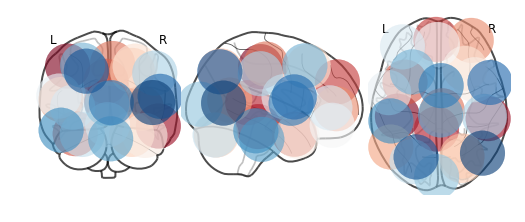

In [14]:
htfa.plot_factor_centers()

/home/zulqarnain/.conda/envs/htfatorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1307: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


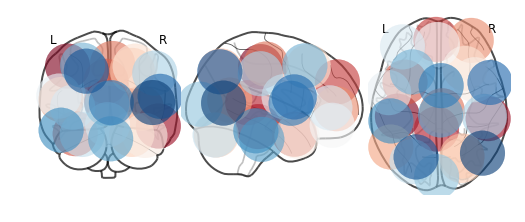

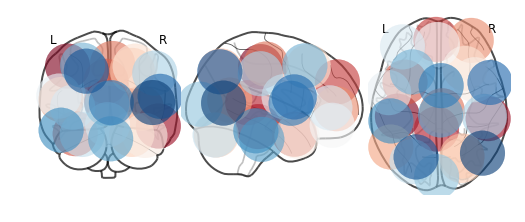

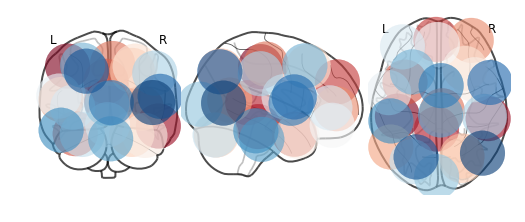

In [ ]:
for s in range(htfa.num_subjects):
    htfa.plot_factor_centers(subject=s)

In [ ]:
losses = htfa.train(num_steps=5, learning_rate=2e-1, log_level=logging.INFO, num_particles=4,batch_size=32,
                    use_cuda=True)

04/08/2018 22:57:36 [Epoch 1] (1762ms) Posterior free-energy 2.30979195e+10
04/08/2018 22:57:37 [Epoch 2] (1225ms) Posterior free-energy 9.07761050e+09
04/08/2018 22:57:38 [Epoch 3] (1167ms) Posterior free-energy 5.34796339e+09
04/08/2018 22:57:39 [Epoch 4] (1216ms) Posterior free-energy 4.28891930e+09
04/08/2018 22:57:40 [Epoch 5] (1205ms) Posterior free-energy 3.92753664e+09
04/08/2018 22:57:42 [Epoch 6] (1101ms) Posterior free-energy 3.77065651e+09
04/08/2018 22:57:43 [Epoch 7] (1199ms) Posterior free-energy 3.68899046e+09
04/08/2018 22:57:44 [Epoch 8] (1164ms) Posterior free-energy 3.64663757e+09
04/08/2018 22:57:45 [Epoch 9] (1154ms) Posterior free-energy 3.60872806e+09
04/08/2018 22:57:46 [Epoch 10] (1132ms) Posterior free-energy 3.59456998e+09
04/08/2018 22:57:47 [Epoch 11] (1129ms) Posterior free-energy 3.57639245e+09
04/08/2018 22:57:49 [Epoch 12] (1184ms) Posterior free-energy 3.56036173e+09
04/08/2018 22:57:50 [Epoch 13] (1175ms) Posterior free-energy 3.54564403e+09
04/08/20

04/08/2018 22:59:42 [Epoch 108] (1138ms) Posterior free-energy 2.74402995e+09
04/08/2018 22:59:43 [Epoch 109] (1190ms) Posterior free-energy 2.74430131e+09
04/08/2018 22:59:44 [Epoch 110] (1233ms) Posterior free-energy 2.74511974e+09
04/08/2018 22:59:45 [Epoch 111] (1141ms) Posterior free-energy 2.74245018e+09
04/08/2018 22:59:47 [Epoch 112] (1188ms) Posterior free-energy 2.74439296e+09
04/08/2018 22:59:48 [Epoch 113] (1142ms) Posterior free-energy 2.74400230e+09
04/08/2018 22:59:49 [Epoch 114] (1174ms) Posterior free-energy 2.74387046e+09
04/08/2018 22:59:50 [Epoch 115] (1143ms) Posterior free-energy 2.74168883e+09
04/08/2018 22:59:51 [Epoch 116] (1130ms) Posterior free-energy 2.74270925e+09
04/08/2018 22:59:52 [Epoch 117] (1170ms) Posterior free-energy 2.73771853e+09
04/08/2018 22:59:54 [Epoch 118] (1150ms) Posterior free-energy 2.73937920e+09
04/08/2018 22:59:55 [Epoch 119] (1211ms) Posterior free-energy 2.73867418e+09
04/08/2018 22:59:56 [Epoch 120] (1185ms) Posterior free-energy 2

In [18]:
utils.plot_losses(losses)

NameError: name 'losses' is not defined

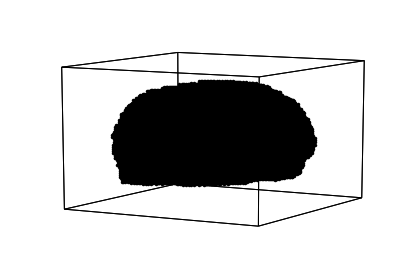

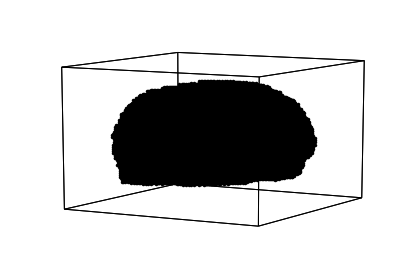

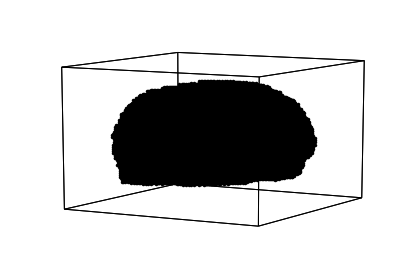

In [18]:
htfa.plot_voxels()

In [19]:
posterior_sample, q = htfa.sample(posterior_predictive=True)

for s in range(htfa.num_subjects):
    logging.info('Posterior Reconstruction Error (Frobenius Norm) for subject %d: %.8e', s,
        np.linalg.norm(
            posterior_sample['Y%d' % s].value.data.cpu().numpy() - htfa.voxel_activations[s].numpy()
        )
    )

posterior_sample

04/08/2018 20:44:16 Posterior Reconstruction Error (Frobenius Norm) for subject 0: 4.69901514e+03
04/08/2018 20:44:16 Posterior Reconstruction Error (Frobenius Norm) for subject 1: 4.58268994e+03
04/08/2018 20:44:16 Posterior Reconstruction Error (Frobenius Norm) for subject 2: 4.73122510e+03


Trace{'template_factor_centers': Normal([torch.FloatTensor of size 1x10x3]), 'template_factor_log_widths': Normal([torch.FloatTensor of size 1x10]), 'voxel_noise': Normal([torch.FloatTensor of size 1x3]), 'Weights0': Normal([torch.FloatTensor of size 1x300x10]), 'FactorCenters0': Normal([torch.FloatTensor of size 1x10x3]), 'FactorLogWidths0': Normal([torch.FloatTensor of size 1x10]), 'Weights1': Normal([torch.FloatTensor of size 1x300x10]), 'FactorCenters1': Normal([torch.FloatTensor of size 1x10x3]), 'FactorLogWidths1': Normal([torch.FloatTensor of size 1x10]), 'Weights2': Normal([torch.FloatTensor of size 1x300x10]), 'FactorCenters2': Normal([torch.FloatTensor of size 1x10x3]), 'FactorLogWidths2': Normal([torch.FloatTensor of size 1x10]), 'Y0': Normal([torch.FloatTensor of size 1x300x86184]), 'Y1': Normal([torch.FloatTensor of size 1x300x86184]), 'Y2': Normal([torch.FloatTensor of size 1x300x86184])}

/home/zulqarnain/.conda/envs/htfatorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1307: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


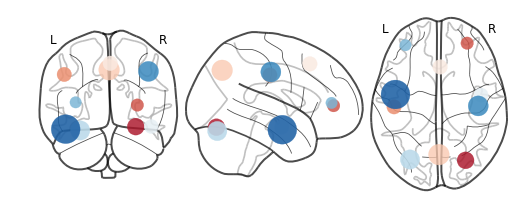

In [20]:
htfa.plot_factor_centers(trace=posterior_sample)

/home/zulqarnain/.conda/envs/htfatorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1307: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


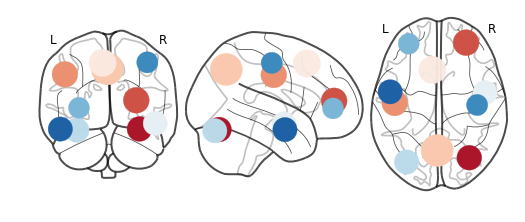

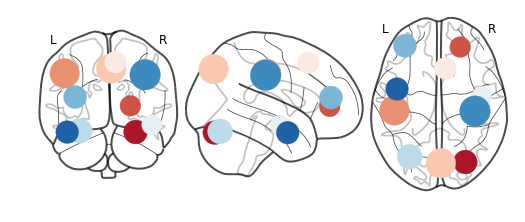

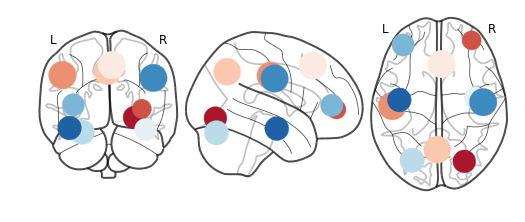

In [21]:
for s in range(htfa.num_subjects):
    htfa.plot_factor_centers(subject=s, trace=posterior_sample)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


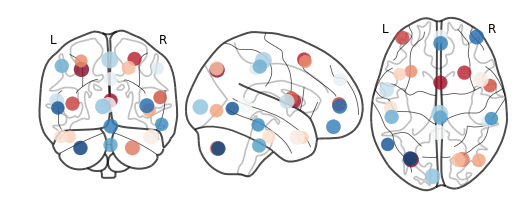

In [22]:
htfa.plot_factor_centers()

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


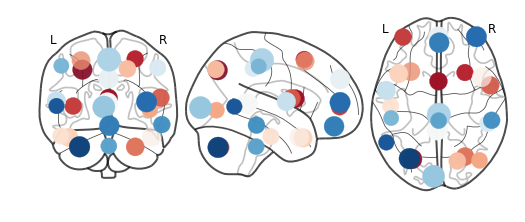

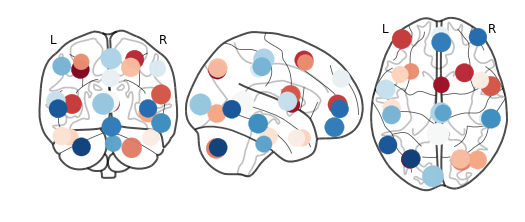

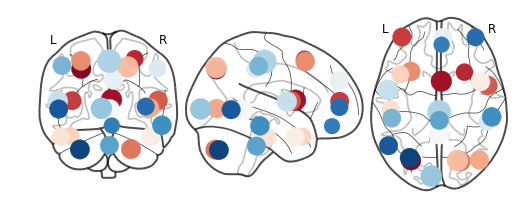

In [23]:
for s in range(htfa.num_subjects):
    htfa.plot_factor_centers(subject=s)